# Practica 4: Visualización de datos

## Análisis de ventas por tienda

Importamos las librerías a emplear

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importamos el conjunto de datos pertinente

In [5]:
dataset_df = pd.read_csv("C:/Users/Admin/OneDrive/Curso Maestro Visualizaciones y Análisis de Datos en Python/data/tienda_ventas.csv")
dataset_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,1,2013-01-01,1,BABY CARE,0.00000,0
2,2,2013-01-01,1,BEAUTY,0.00000,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0
4,4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0


Contamos cuantas tiendas diferentes hay en el conjunto de datos

In [7]:
len(dataset_df["store_nbr"].unique())

54

Agrupamos las tiendas para ver cómo ha sido su total de ventas

In [9]:
grd_stores = dataset_df.groupby("store_nbr").agg({"sales": 'sum'})
grd_stores.head(10)

,sales
store_nbr,
1,9.181626e+06
2,1.410272e+07
3,3.267186e+07
4,1.247039e+07
5,1.087617e+07
6,1.655468e+07
7,1.720570e+07
8,1.975790e+07
9,1.752849e+07


In [10]:
dataset_df["mes"] = dataset_df["date"].apply(lambda x: x[:7])
dataset_df

,id,date,store_nbr,family,sales,onpromotion,mes
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0,2016-04


Vemos los estadísticos de ventas que tiene cada tienda

In [12]:
grd_stores.describe()

,sales
count,5.400000e+01
mean,1.269988e+07
std,8.858355e+06
min,0.000000e+00
25%,7.091574e+06
50%,1.063859e+07
75%,1.625086e+07
max,4.063205e+07


Notamos que el valor mínimo en el conjunto de datos es de 0 ventas en una de las teindas por lo que nuestros estadísticos pueden verse afectados por este valor. De este modo decidimo eliminar esta tienda de nuestra conjunto de datos.

In [14]:
grd_stores = grd_stores.reset_index()
grd_stores

,store_nbr,sales
0,1,9.181626e+06
1,2,1.410272e+07
2,3,3.267186e+07
3,4,1.247039e+07
4,5,1.087617e+07
5,6,1.655468e+07
6,7,1.720570e+07
7,8,1.975790e+07
8,9,1.752849e+07
9,10,6.631391e+06


In [15]:
store_min = grd_stores.loc[grd_stores["sales"] == 0.0, "store_nbr"]
store_min

51    52
Name: store_nbr, dtype: int64

In [16]:
grd_stores = grd_stores.drop(51)
grd_stores = grd_stores.set_index("store_nbr")
grd_stores

,sales
store_nbr,
1,9.181626e+06
2,1.410272e+07
3,3.267186e+07
4,1.247039e+07
5,1.087617e+07
6,1.655468e+07
7,1.720570e+07
8,1.975790e+07
9,1.752849e+07


In [17]:
grd_stores.describe()

,sales
count,5.300000e+01
mean,1.293950e+07
std,8.764663e+06
min,1.162909e+06
25%,7.295357e+06
50%,1.087617e+07
75%,1.655468e+07
max,4.063205e+07


Realizamos un diagrama de cajas para ver la distribucion de ventas por tienda

Text(0, 0.5, 'Ventas')

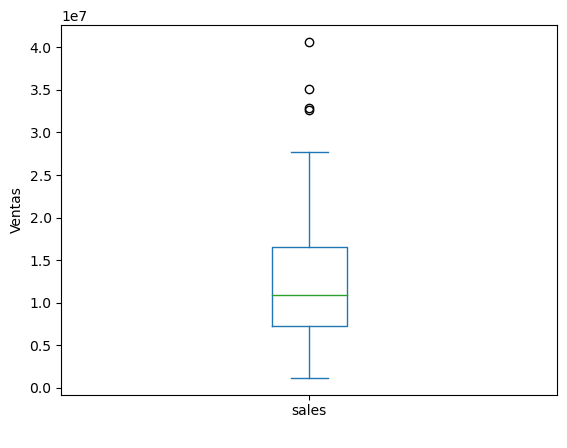

In [62]:
grd_stores.plot.box()
plt.xlabel(" ")
plt.ylabel("Ventas")

Relizamos un histograma para ver la distribución de ventas de cada tienda

Text(0, 0.5, 'No. de Tiendas')

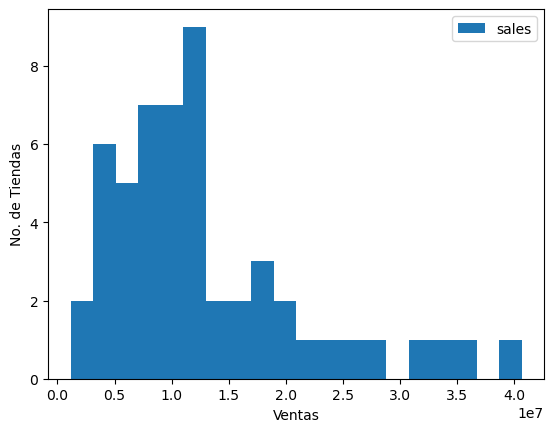

In [70]:
grd_stores.plot.hist(bins = 20)
plt.xlabel("Ventas")
plt.ylabel("No. de Tiendas")

Ordenamos las tiendas por cantidad de ventas total

In [76]:
sort_grd_stores = grd_stores.sort_values("sales", ascending = False).head(10)
sort_grd_stores

,sales
store_nbr,
44,4.063205e+07
45,3.511369e+07
47,3.292287e+07
3,3.267186e+07
46,2.766196e+07
49,2.645239e+07
48,2.392486e+07
51,2.179748e+07
8,1.975790e+07


Tomamos el top 5 de tiendas con más total de ventas

In [82]:
top5_stores = sort_grd_stores.head(5)
top5_stores

,sales
store_nbr,
44,4.063205e+07
45,3.511369e+07
47,3.292287e+07
3,3.267186e+07
46,2.766196e+07


Filtramos el dataset original con las cinco tiendas de nuestro top 5

In [90]:
top5_df = dataset_df[dataset_df["store_nbr"].isin(top5_stores.index)]
top5_df

,id,date,store_nbr,family,sales,onpromotion,mes
726,726,2013-01-01,3,AUTOMOTIVE,0.000,0,2013-01
727,727,2013-01-01,3,BABY CARE,0.000,0,2013-01
728,728,2013-01-01,3,BEAUTY,0.000,0,2013-01
729,729,2013-01-01,3,BEVERAGES,0.000,0,2013-01
730,730,2013-01-01,3,BOOKS,0.000,0,2013-01
...,...,...,...,...,...,...,...
2161165,2161165,2016-04-30,47,POULTRY,1687.844,1,2016-04
2161166,2161166,2016-04-30,47,PREPARED FOODS,431.271,0,2016-04
2161167,2161167,2016-04-30,47,PRODUCE,7533.308,1,2016-04
2161168,2161168,2016-04-30,47,SCHOOL AND OFFICE SUPPLIES,11.000,0,2016-04


Agrupamos este nuevo dataset por tienda y sumando sus totales de ventas por mes

In [92]:
top5_monthly = top5_df.groupby(["store_nbr", "mes"]).agg({"sales": 'sum'})
top5_monthly

sales
store_nbr mes                  
3         2013-01  4.965743e+05
          2013-02  4.296186e+05
          2013-03  5.316862e+05
          2013-04  5.120721e+05
          2013-05  5.181973e+05
...                         ...
47        2015-12  1.264874e+06
          2016-01  1.154481e+06
          2016-02  1.028481e+06
          2016-03  1.078566e+06
          2016-04  1.158896e+06

[200 rows x 1 columns]

Resetamos los índices del Dataframe para poder usar Seaborn

In [94]:
top5_monthly = top5_monthly.reset_index()
top5_monthly

,store_nbr,mes,sales
0,3,2013-01,4.965743e+05
1,3,2013-02,4.296186e+05
2,3,2013-03,5.316862e+05
3,3,2013-04,5.120721e+05
4,3,2013-05,5.181973e+05
...,...,...,...
195,47,2015-12,1.264874e+06
196,47,2016-01,1.154481e+06
197,47,2016-02,1.028481e+06
198,47,2016-03,1.078566e+06


Visualizamos el histórico de ventas por mes en estas tiendas 

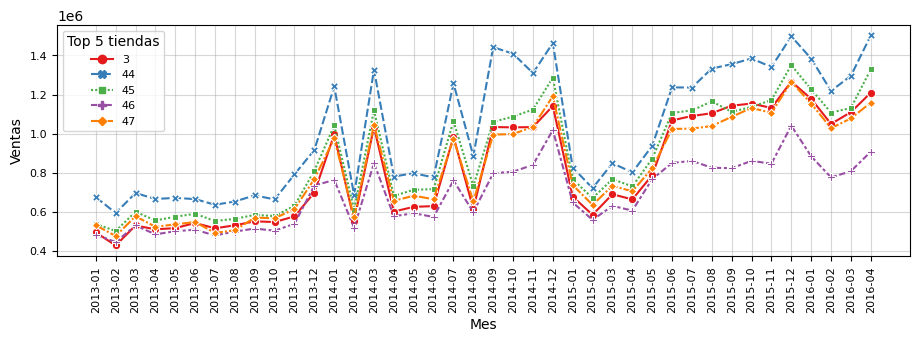

In [142]:
graph_hist = sns.lineplot(
    data = top5_monthly, 
    x = "mes", 
    y = "sales", 
    hue = "store_nbr",
    style = "store_nbr",
    markers = True,
    palette = 'Set1'
)

graph_hist.tick_params(axis = 'x', labelrotation = 90, labelsize = 8)

graph_hist.tick_params(axis = 'y', labelsize = 8)

graph_hist.grid(visible = True, axis = 'x', alpha = 0.5)

graph_hist.grid(visible = True, axis = 'y', alpha = 0.5)

graph_hist.legend(
    title = "Top 5 tiendas",
    bbox_to_anchor = (0,1),
    fontsize = 8,
    loc = 'upper left'
)

graph_hist.set_xlabel("Mes")

graph_hist.set_ylabel("Ventas")

fig_hist = graph_hist.get_figure()
fig_hist.set_size_inches(11,3)

En este punto podríamos interesarnos por resaltar las ventas de una sola tienda, por ejemplo, la tienda 3. 

In [160]:
top5_stores.index

Index([44, 45, 47, 3, 46], dtype='int64', name='store_nbr')

Creamos un diccionario con los estilos que asignaremos a cada tienda

In [162]:
store_styles = {
    44: ['grey', 0.5, '+', '--', 1],
    45: ['grey', 0.5, 's', '--', 1],
    47: ['grey', 0.5, 'x', '--', 1],
     3: ['red', 1.0, 'o', '-', 1.5],
    46: ['grey', 0.5, 'D', '--', 1]
}

Graficamos

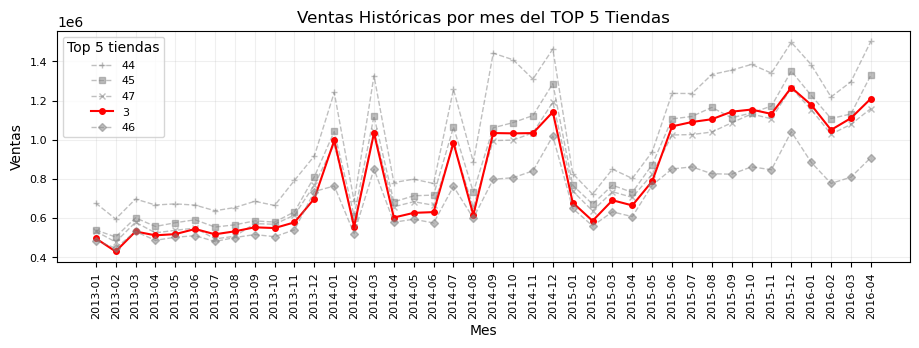

In [172]:
fig_hist2, sub_fig = plt.subplots()

for store in top5_stores.index:
    style = store_styles[store]
    df_tmp = top5_monthly[top5_monthly["store_nbr"] == store]
    sub_fig.plot(
        df_tmp["mes"], 
        df_tmp["sales"], 
        label = store, 
        markersize = 4,
        color = style[0],
        alpha = style[1],
        marker = style[2],
        linestyle = style[3],
        linewidth = style[4]
    )

sub_fig.tick_params(axis = 'x', labelrotation = 90, labelsize = 8)

sub_fig.tick_params(axis = 'y', labelsize = 8)

sub_fig.grid(visible = True, axis = 'x', alpha = 0.2)

sub_fig.grid(visible = True, axis = 'y', alpha = 0.2)

sub_fig.legend(
    title = 'Top 5 tiendas',
    labels = top5_stores.index,
    bbox_to_anchor = (0,1), 
    fontsize = 8,
    loc = 'upper left'
)

sub_fig.set_ylabel('Ventas')
sub_fig.set_xlabel('Mes')
sub_fig.set_title('Ventas Históricas por mes del TOP 5 Tiendas')
    
fig_hist2.set_size_inches(11,3)